# This notebook will plot some filters of the nn

In [1]:
import logging
from torch.utils.data import DataLoader
import torch
import numpy as np

import os
import sys
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader

sys.path.append('/Data/reds_dataset/6.8300-Computer-Vision/src/')

In [2]:
state_dict = torch.load('../results_best/multistage_bvsr_trial_fixed/models/model_20.pth', map_location=torch.device('cpu'))
state_dict = {k.replace('_orig_mod.',''): v for k, v in state_dict.items()}

In [3]:
attention_filters = {k:v for k, v in state_dict.items() if 'attention' in k}

In [4]:
state_dict_upsample = {k:v for k, v in state_dict.items() if 'upsample' in k}

In [5]:
filter = state_dict_upsample['upsample1.upsample_conv.weight']

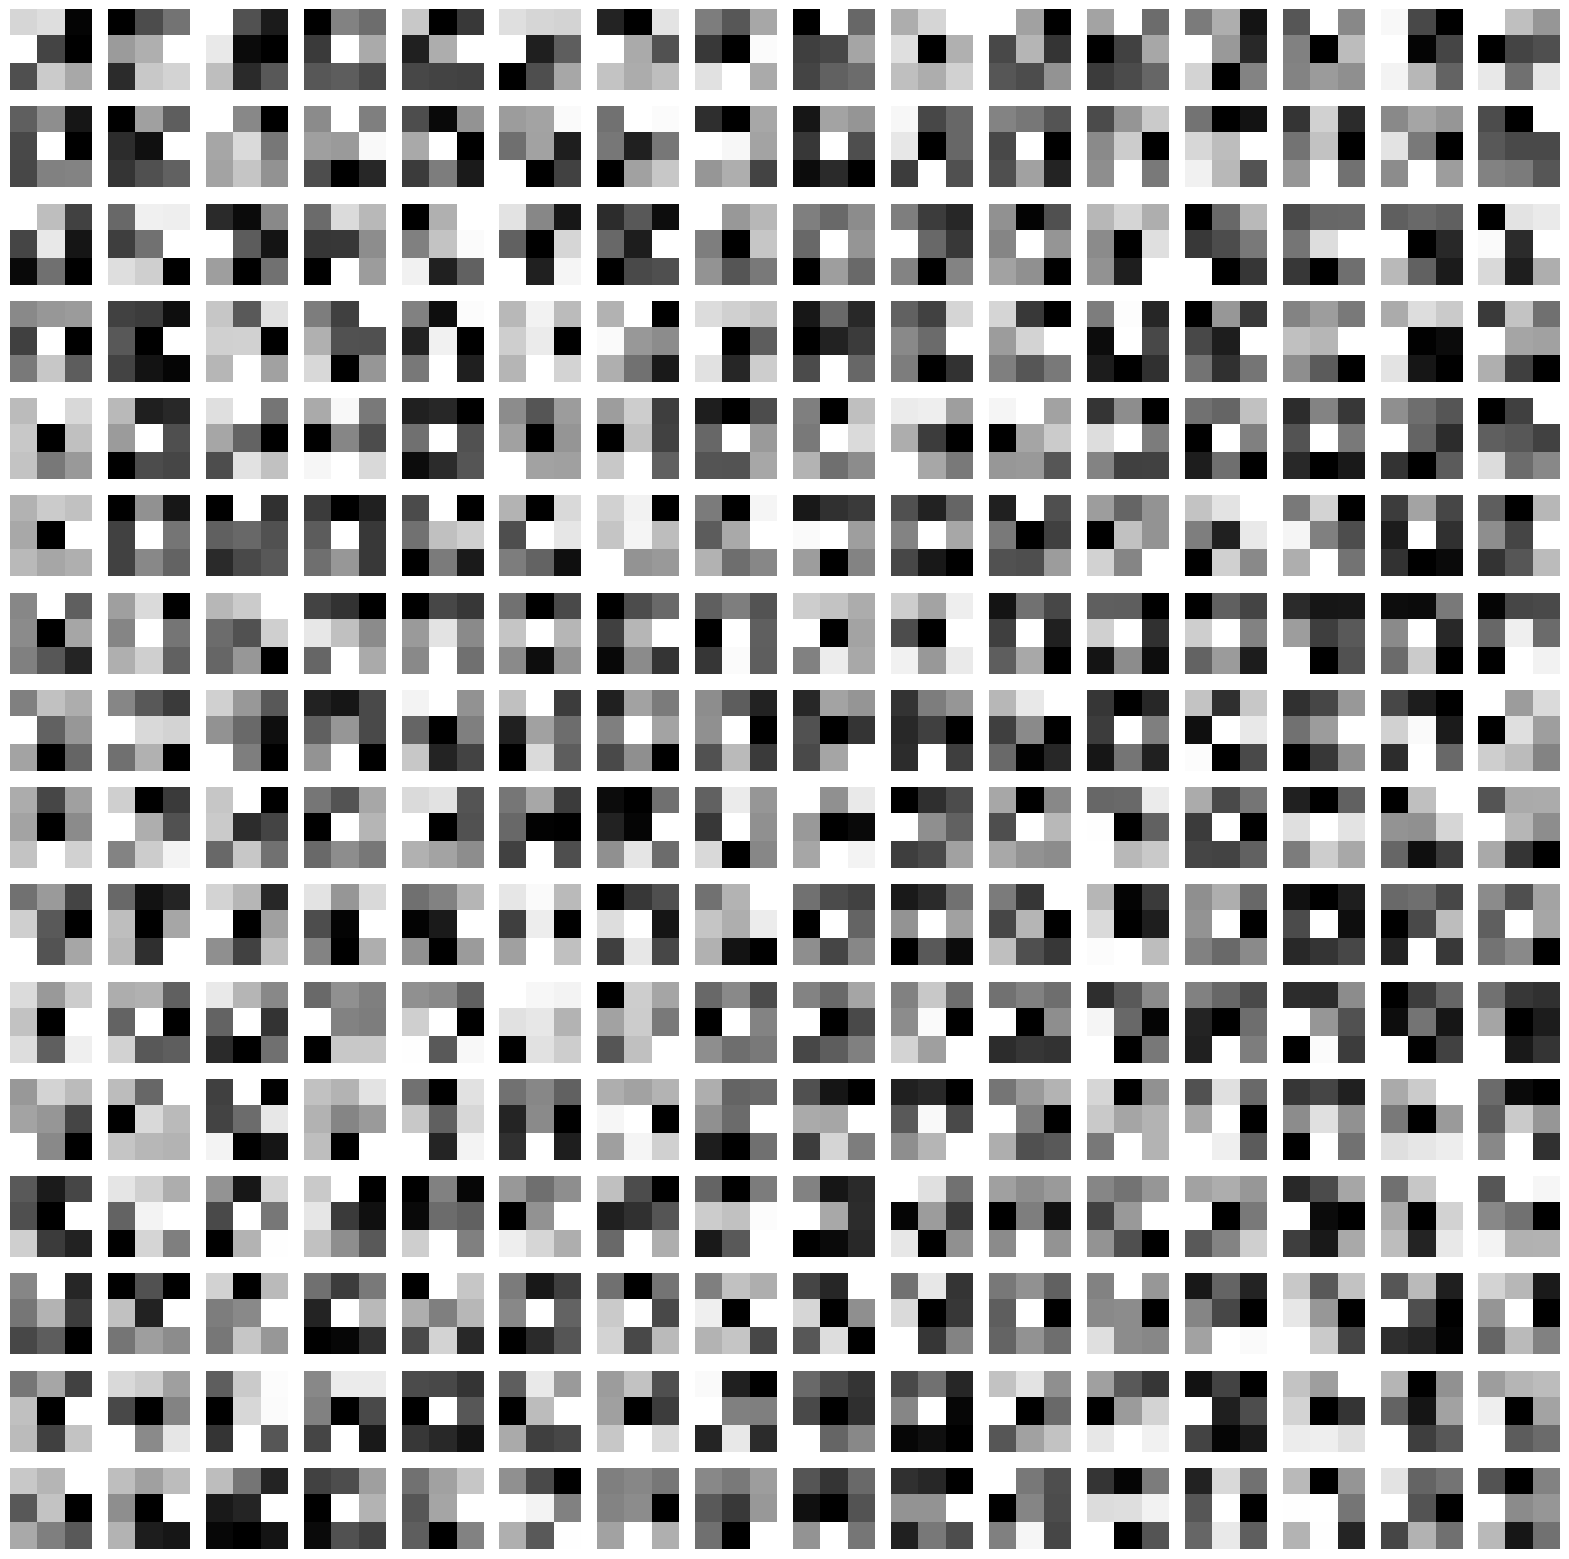

In [10]:
H, W = filter.shape[0], filter.shape[1]
fig, axs = plt.subplots(16, 16, figsize=(20,20))
for i in range(16):
    for j in range(16):
        filt = filter[i,j,:,:].detach().numpy()
        filt_ccaled = (filt - np.min(filt)) / (np.max(filt) - np.min(filt))
        axs[i,j].imshow(filt_ccaled, cmap='gray')
        axs[i,j].axis('off')